Uber Data Analysis With Python
Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will mainly use data regarding Uber ride

In this project, we will use Python to analyze data from Uber.

By the end of this lesson, you will gain a hands-on experience with Python in analyzing data.

We will use Python to:

Check how long do people travel with Uber?

What Hour Do Most People Take Uber To Their Destination?

Check The Purpose Of Trips

Which Day Has The Highest Number Of Trips

What Are The Number Of Trips Per Each Day?

What Are The Trips In The Month

The starting points of trips. Where Do People Start Boarding Their Trip From Most?

Import The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
data = pd.read_csv(r'C:\Users\abarr\Downloads\Uber Drives - .csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Checking for missing values

In [5]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

Dropping data should be the last option. It skews the data.

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB


In [14]:
data.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

Formating the date columns

In [17]:
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [18]:
data.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [20]:
hour = []
day = []
dayofweek = []
month = []
weekday = []
for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday


In [21]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:17:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:38:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:45:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 15:49:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,15,6,2,1,Wednesday
5,2016-01-06 17:19:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


Categories we have

In [22]:
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

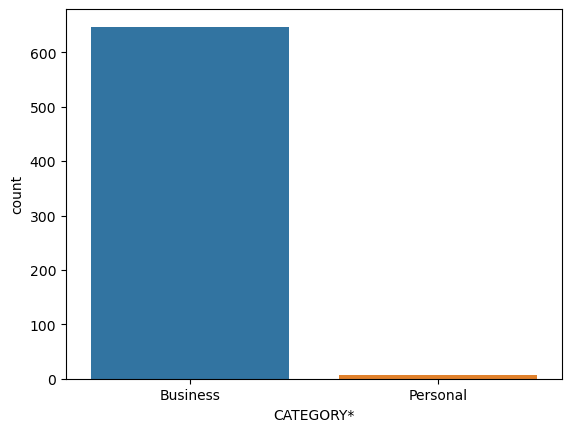

In [25]:
sns.countplot(data = data, x = 'CATEGORY*');

How long do people travel with uber?

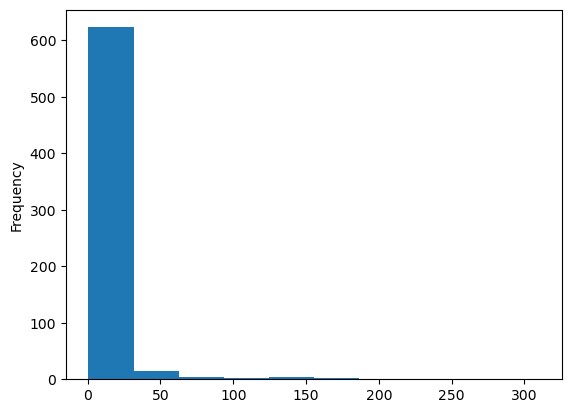

In [27]:
data['MILES*'].plot.hist();

What hour do most people book uber to their destination?

In [29]:
hour = data['START_DATE*'].dt.hour.value_counts()

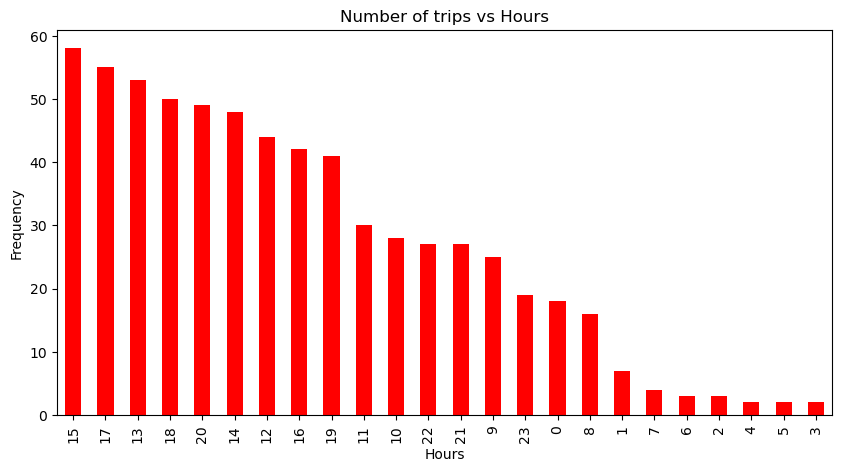

In [31]:
hour.plot(kind = 'bar', color = 'red', figsize = (10, 5))
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Number of trips vs Hours")
plt.show()

Check the purpose of the trip

In [32]:
data['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

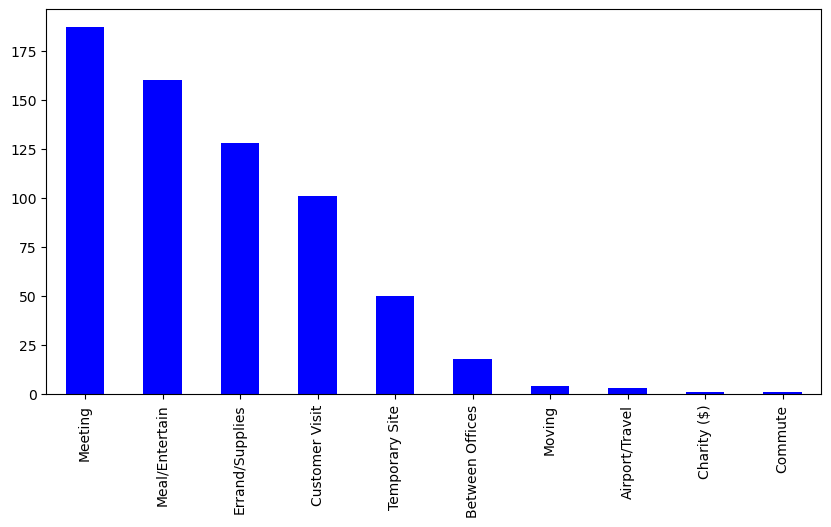

In [35]:
data['PURPOSE*'].value_counts().plot(kind = 'bar', color = 'blue', figsize = (10, 5));

Which day has the highest number of trips?

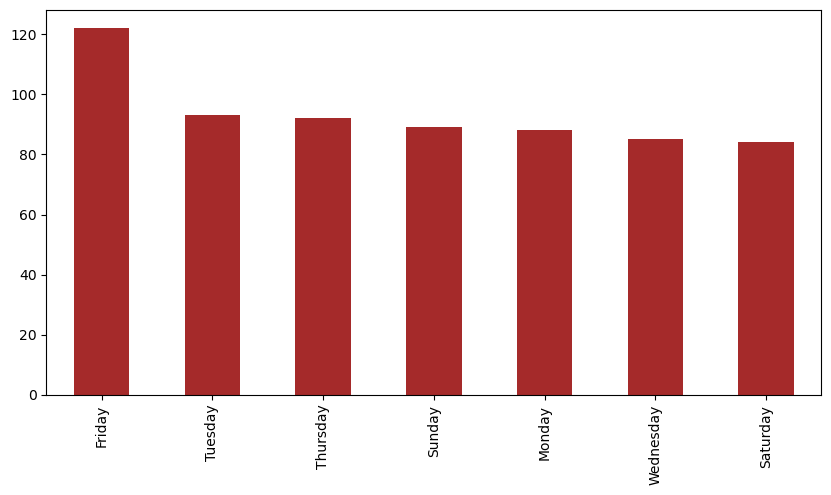

In [36]:
data['WEEKDAY'].value_counts().plot(kind = 'bar', color = 'brown', figsize = (10, 5));

What are the number of trips per day?

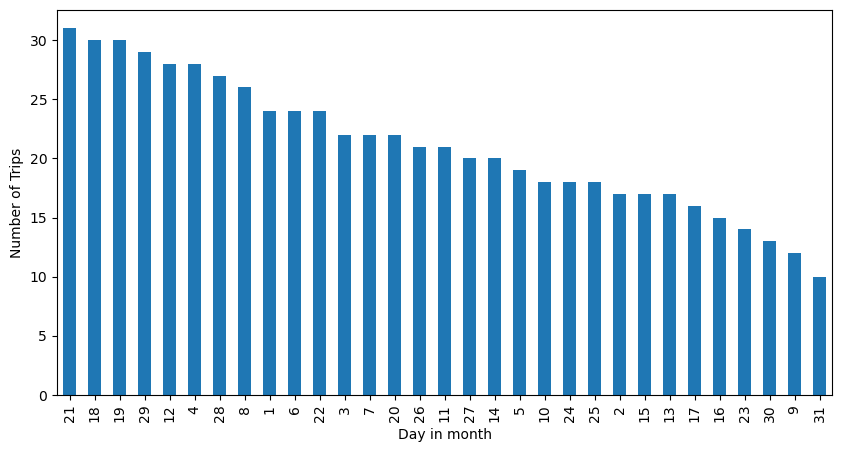

In [41]:
data['DAY'].value_counts().plot(kind = 'bar', figsize = (10, 5))
plt.xlabel('Day in month')
plt.ylabel('Number of Trips');

What are the trips in the month?

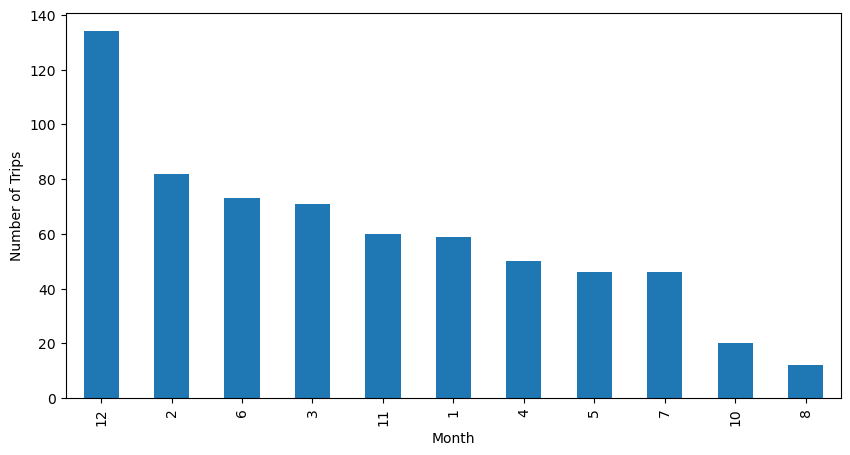

In [40]:
data['MONTH'].value_counts().plot(kind = 'bar', figsize = (10, 5))
plt.xlabel('Month')
plt.ylabel('Number of Trips');

The starting points of the trips. Where do people start boarding their trip from the most?

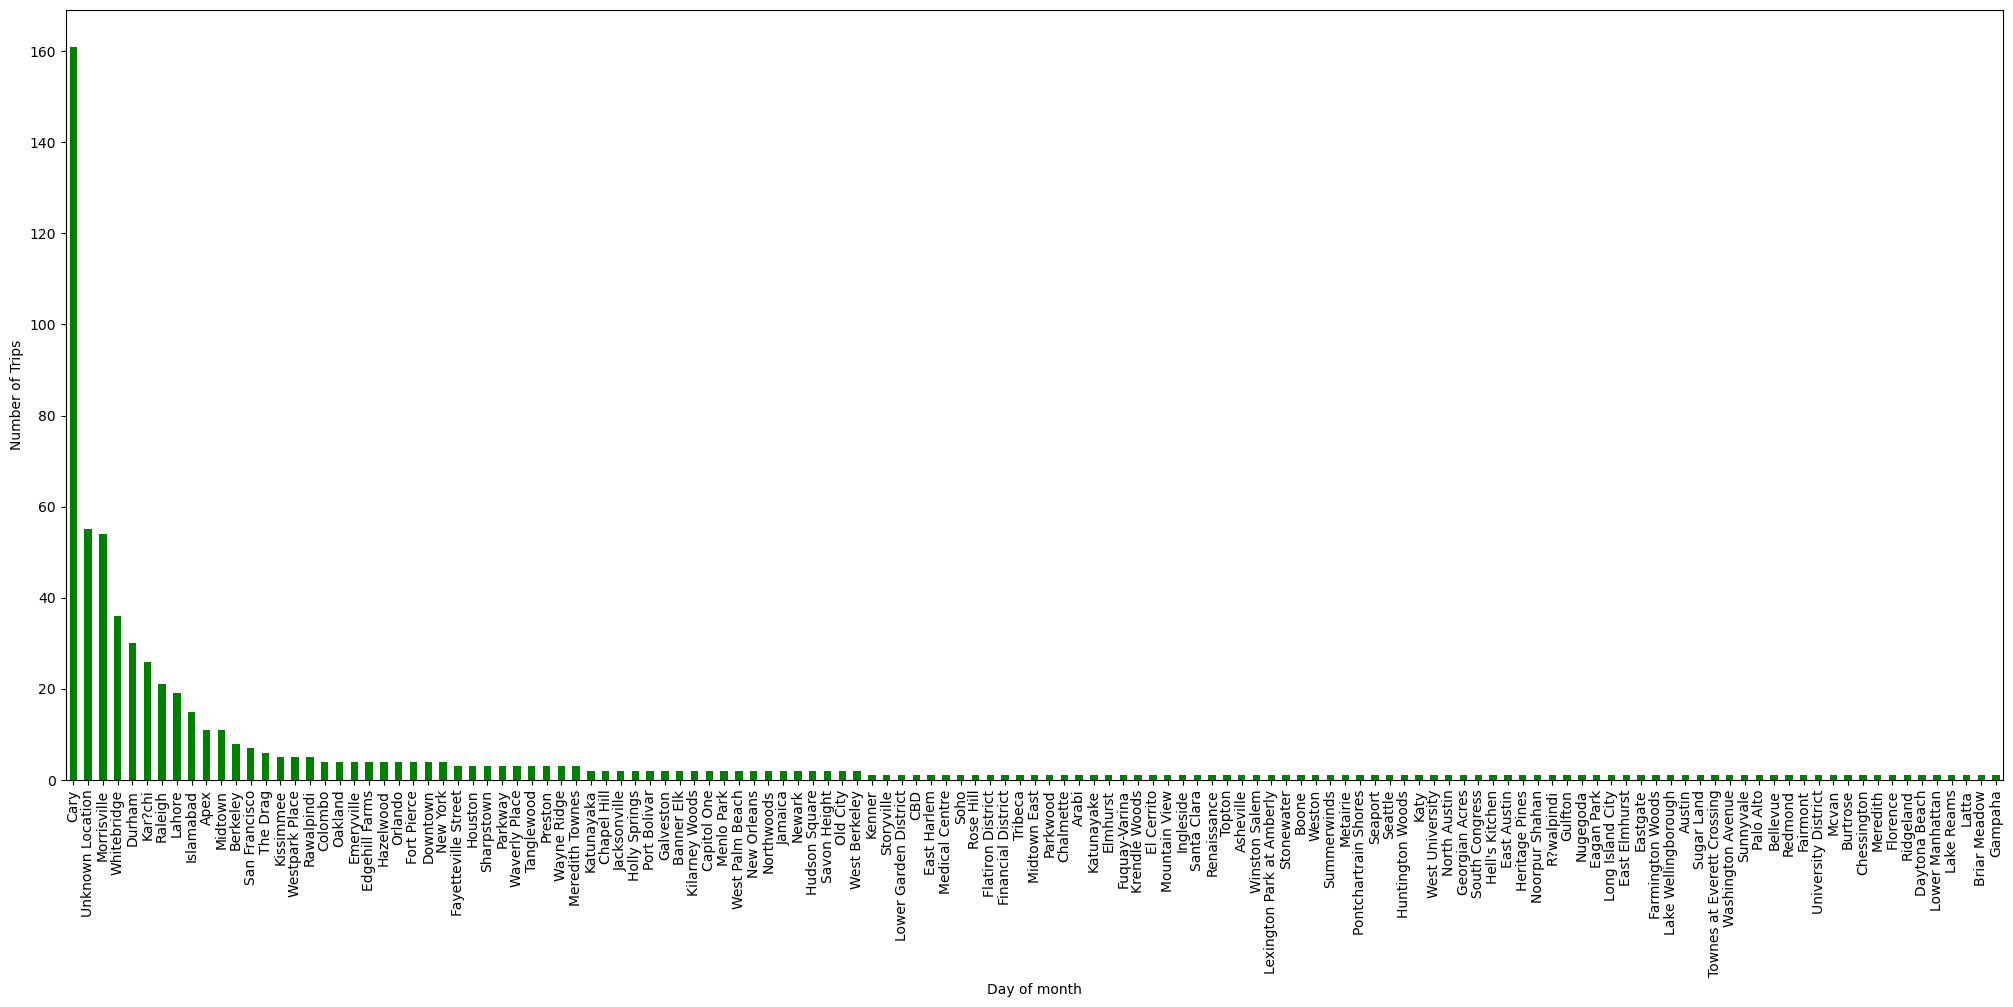

In [44]:
data['START*'].value_counts().plot(kind = 'bar', color = 'green', figsize = (25, 10))
plt.xlabel('Day of month')
plt.ylabel('Number of Trips');